In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sn
from sklearn.utils import resample



In [5]:
df = pd.read_csv('riceClassification.csv')

In [6]:
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [7]:
df.isnull().sum()
# No Null Values

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [8]:
No_cols = df.columns.size
No_cols

12

In [9]:
def Scaling(data):

    for j in range(No_cols-1):
        data[data.columns[j]] = data[data.columns[j]]/data[data.columns[j]].max()
    return(data)

    Scale_df = Scaling(df)

    df = Scale_df

In [10]:
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [11]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [12]:
df["Class"].value_counts()

1    9985
0    8200
Name: Class, dtype: int64

In [13]:
class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]

In [14]:
class_0_count,class_1_count = df.Class.value_counts()

In [15]:
print(class_0_count,class_1_count)

9985 8200


In [16]:
class_1_overS = class_1.sample(class_0_count,replace = True)
# We can add random values from that class to over sample that dataset...But replace = True os required for over sampling
class_1_overS.shape

(9985, 12)

In [17]:
balanced_df = pd.concat([class_1_overS,class_0])
balanced_df.shape

(18185, 12)

In [18]:
df = balanced_df

In [19]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Class'])
y = df["Class"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.1, random_state = 15)

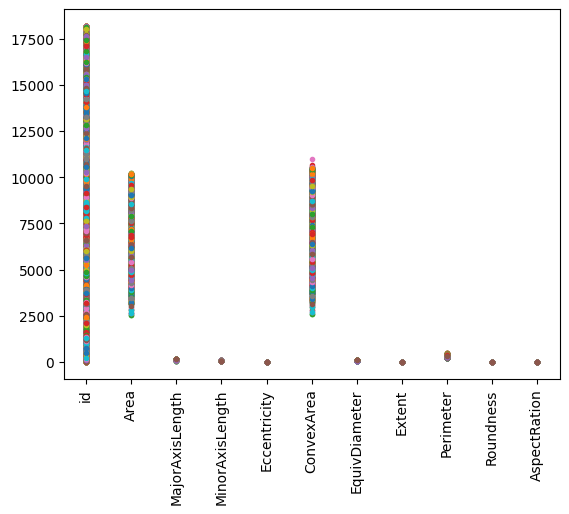

In [20]:
plt.plot(X_train.T, '.')
plt.xticks(rotation='vertical')
plt.show()

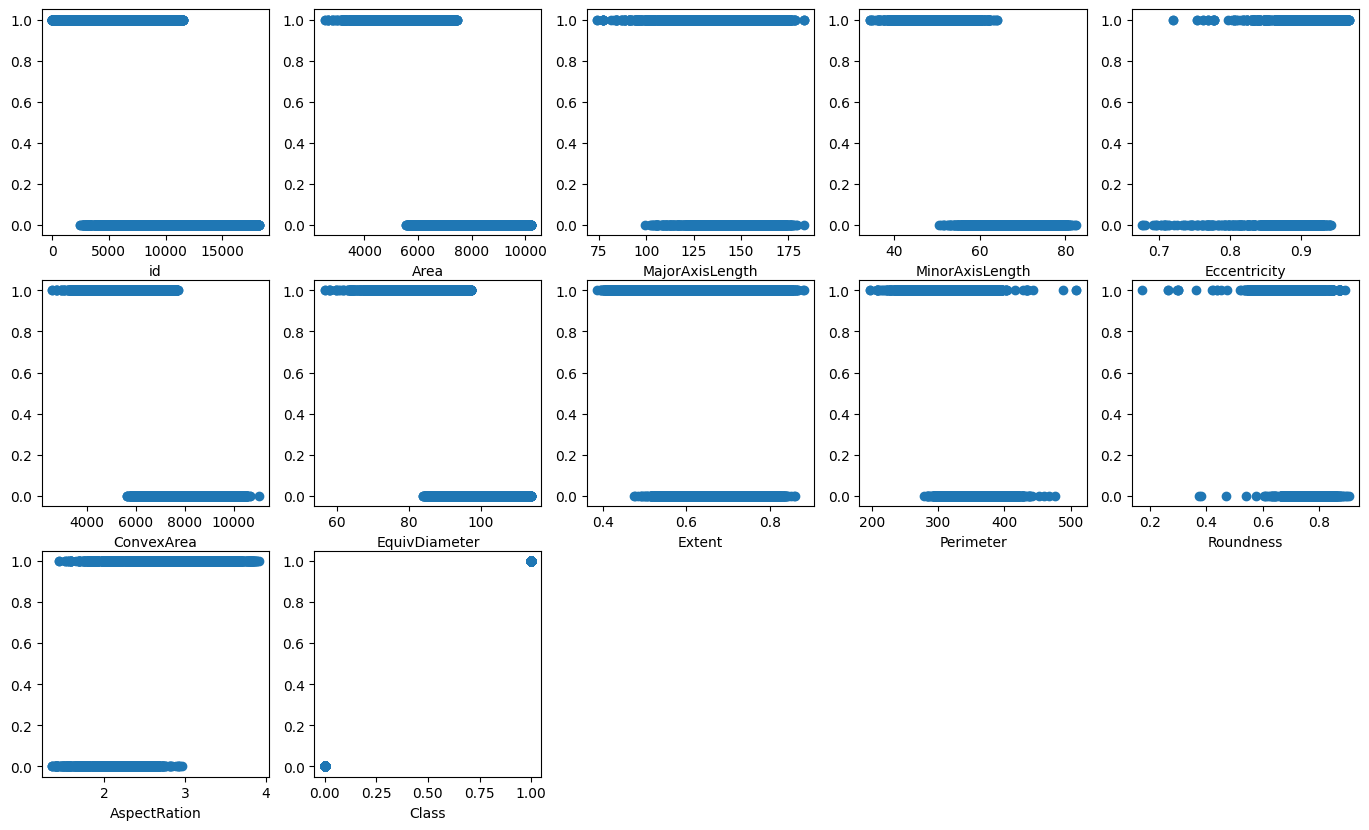

In [21]:
plt.figure(figsize=(17,17))
for j in range(No_cols):
    plt.subplot(5,5,j+1)
    x = df[df.columns[j]]
    y = df['Class']
    plt.scatter(x, y)
    plt.xlabel(df.columns[j])
# This Visualization shows that no any parameter in this dataset that can directly used for classification

In [22]:
x_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])
x_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [23]:
X_test = x_binarised_test.values
X_train = x_binarised_train.values



In [24]:
X_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=object)

In [25]:
for b in range(X_train.shape[1] + 1):
    y_pred_train = []
    accurate_rows = 0

    for x, y in zip(X_train, y_train):
        y_pred = (np.sum(x) <= b)
        y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows, accurate_rows/X_train.shape[0])

0 7354 0.4493462055480875
1 4849 0.2962849810582916
2 1939 0.11847733105218135
3 2340 0.1429793474275938
4 3076 0.18795062935353782
5 4521 0.2762434315043383
6 7080 0.4326041793963094
7 8446 0.516069901014298
8 8771 0.5359281437125748
9 9000 0.5499205670292069
10 9011 0.550592692166687
11 9011 0.550592692166687


In [26]:
b = 10
y_pred_test = []
accurate_rows = 0

for x, y in zip(X_test, y_test):
    y_pred = (np.sum(x) <= b)
    y_pred_test.append(y_pred)
    accurate_rows += (y == y_pred)

print(b, accurate_rows, accurate_rows/X_test.shape[0])

10 974 0.5354590434304562


In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)

<Axes: >

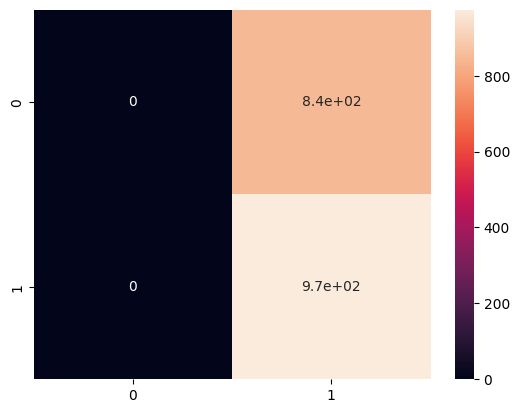

In [28]:
import seaborn as sn
sn.heatmap(cm,annot=True)

In [29]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       845
           1       0.54      1.00      0.70       974

    accuracy                           0.54      1819
   macro avg       0.27      0.50      0.35      1819
weighted avg       0.29      0.54      0.37      1819



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
class MPNeuron:

    def __init__(self):
        self.b = None

    def model(self, x):
        return(sum(x) <= self.b)

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y):
        accuracy = {}

        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)

        best_b = max(accuracy,key = accuracy.get)
        self.b = best_b

        print('Optimal Value of  is', best_b)
        print('Highest accuracy is',accuracy[best_b])

In [31]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_train, y_train)

Optimal Value of  is 10
Highest accuracy is 0.550592692166687


In [32]:
predicted = mp_neuron.predict(X_test)
accuracy_test = accuracy_score(predicted, y_test)
print(accuracy_test)

0.5354590434304562


In [33]:
class Perceptron:
# Globl variables weight and bias
    def __init__ (self):
        self.w = None
        self.b = None

# model
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y, epochs = 1, lr = 1):
        self.w = np.ones(X.shape[1])
        self.b = 0

        accuracy = {}
        max_accuracy = 0

        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)

                if  y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1

            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b

        self.w = chkptw
        self.b = chkptb

        print("Max Accuracy", max_accuracy)

        plt.plot(list(accuracy.values()))
        plt.ylim([0, 1])
        plt.show()

Max Accuracy 0.9916289869241109


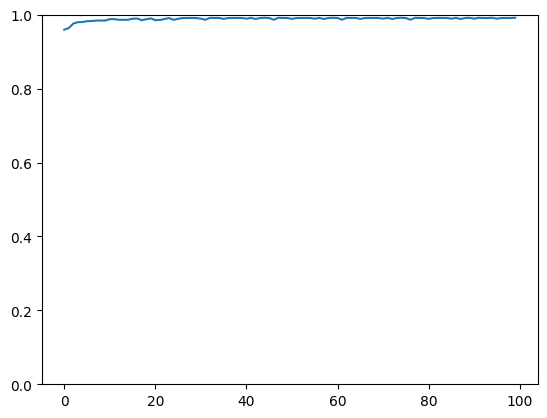

In [34]:
perceptron =Perceptron()
perceptron.fit(X_train, y_train,100,0.001)

In [35]:
predicted = perceptron.predict(X_test)
accuracy_test = accuracy_score(predicted, y_test)
print(accuracy_test)

0.9912039582188016


<Axes: >

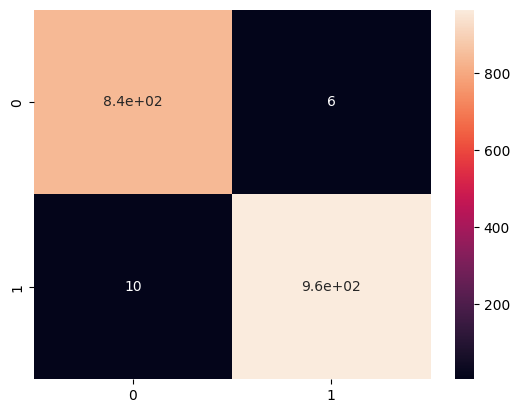

In [36]:
cm = confusion_matrix(y_test,predicted)
sn.heatmap(cm,annot=True)

In [37]:

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       845
           1       0.54      1.00      0.70       974

    accuracy                           0.54      1819
   macro avg       0.27      0.50      0.35      1819
weighted avg       0.29      0.54      0.37      1819



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
